# simulate three correlated stocks

In [1]:
import QuantLib as ql 
import matplotlib.pyplot as plt 

plt.style.use('bmh')

In [2]:
# set evaluation_date

eval_date = ql.Date(10, ql.January, 2022)
ql.Settings.instance().evaluationDate = eval_date

In [3]:
# risk-free curve
rf = ql.FlatForward(eval_date, 0.01, ql.Actual360())
risk_free_curve = ql.YieldTermStructureHandle(rf)

In [4]:
# quote for 3 stocks
quotes = [ql.SimpleQuote(s) for s in [100, 80, 110]]

# sigma for 3 stocks
sigmas = [ql.BlackConstantVol(eval_date, ql.TARGET(), sigma, ql.Actual360()) 
          for sigma in [0.2, 0.25, 0.18]]

In [5]:
# create 3 BS processes for 3 stocks
processes = [ql.BlackScholesProcess(ql.QuoteHandle(quote),
                                  risk_free_curve,
                                  ql.BlackVolTermStructureHandle(sigma))
           for quote, sigma in zip(quotes, sigmas)]

In [6]:
# correlation matrix

rho = [[1, 0.6, 0.8],
       [0.6, 1, 0.4],
       [0.8, 0.4, 1]]

In [7]:
# combine processes with rho

process = ql.StochasticProcessArray(processes, rho)

In [8]:
process.factors() # 3 stocks

3

In [9]:
# random number generator

def rng(dimensionality):
    uniform_seq_gen = ql.UniformRandomSequenceGenerator(dimensionality,
                                                        ql.UniformRandomGenerator())
    gaussian_seq_gen = ql.GaussianRandomSequenceGenerator(uniform_seq_gen)
    
    return gaussian_seq_gen

In [10]:
# set time --> simulate 12-step in 1-year
times = [i/12 for i in range(1,13)]
times

[0.08333333333333333,
 0.16666666666666666,
 0.25,
 0.3333333333333333,
 0.4166666666666667,
 0.5,
 0.5833333333333334,
 0.6666666666666666,
 0.75,
 0.8333333333333334,
 0.9166666666666666,
 1.0]

In [11]:
# dimension = num_stocks * num_steps
dim = 3 * len(times)

generator = ql.GaussianMultiPathGenerator(process, times, rng(dim))

In [12]:
samples = generator.next().value()

In [13]:
list(samples)

[<QuantLib.QuantLib.Path; proxy of <Swig Object of type 'Path *' at 0x7fa769a78150> >,
 <QuantLib.QuantLib.Path; proxy of <Swig Object of type 'Path *' at 0x7fa769a782a0> >,
 <QuantLib.QuantLib.Path; proxy of <Swig Object of type 'Path *' at 0x7fa769a78240> >]

In [14]:
list(samples[0])

[100.0,
 101.51000526050076,
 103.12453954352216,
 107.54815796903911,
 110.05161907260081,
 115.14284517013618,
 116.79237883453965,
 128.05953515921976,
 117.87900357616957,
 114.31911689378926,
 117.10219570702438,
 131.61709616866972,
 123.81329453769732]

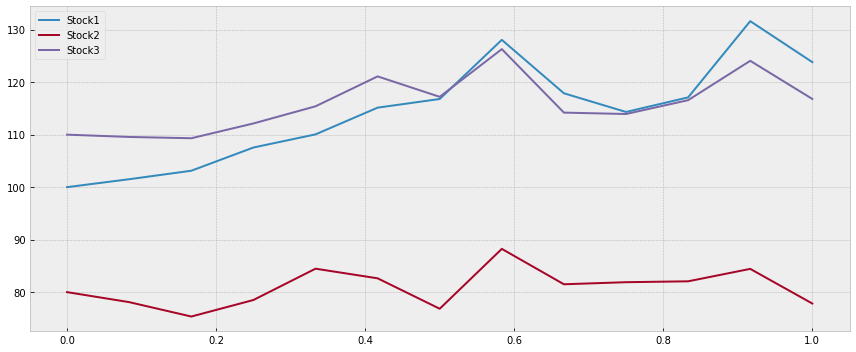

In [15]:
# add time 0 for plotting
ts = [0] + times

fig, ax = plt.subplots(figsize=(12,5))

for i in range(len(list(samples))):
    ax.plot(ts, samples[i], label=f"Stock{i+1}")

ax.legend(loc='best')
plt.tight_layout()
plt.show()